# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [4]:
# Import warnings



In [4]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

df = pd.read_parquet('./trip_records/2023-12.parquet')
# df = df.sort_values('tpep_pickup_datetime').reset_index(drop=True)
df.head(10)
# df.tail(10)
# df.info()
# df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.0,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.3,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.5,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.4,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0
5,1,2023-12-01 00:13:17,2023-12-01 00:23:53,0.0,5.70,1.0,N,88,141,1,23.3,3.5,0.5,0.00,0.0,1.0,28.30,2.5,0.0
6,2,2023-12-01 00:17:09,2023-12-01 00:33:31,1.0,5.33,1.0,N,45,162,1,24.7,1.0,0.5,3.00,0.0,1.0,32.70,2.5,0.0
7,2,2023-12-01 00:40:49,2023-12-01 00:44:10,1.0,0.76,1.0,N,170,107,1,5.8,1.0,0.5,1.00,0.0,1.0,11.80,2.5,0.0
8,2,2023-12-01 00:19:04,2023-12-01 00:34:36,1.0,3.33,1.0,N,186,209,1,17.7,1.0,0.5,3.40,0.0,1.0,26.10,2.5,0.0
9,1,2023-12-01 00:08:39,2023-12-01 00:16:18,1.0,2.10,1.0,N,163,262,1,12.1,3.5,0.5,3.42,0.0,1.0,20.52,2.5,0.0


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Define the data directory and output directory.
data_dir = Path("./trip_records")
output_dir = Path("./output")
output_dir.mkdir(parents=True, exist_ok=True)

file_list = sorted(data_dir.glob("2023-*.parquet"), key=lambda x: int(x.stem.split("-")[1]))

combine_data_file = output_dir / "all_2023_sample_5pct.parquet"

In [ ]:


fraction = 0.05
seed = 42

samples = []
monthly_counts = []

for file_name in file_list:
  print(f"Processing file: {file_name}")
  try:
    df = pd.read_parquet(file_name)
    dt = pd.to_datetime(df["tpep_pickup_datetime"])

    # keeping only 2023 pickups
    mask_2023 = (dt >= "2023-01-01") & (dt < "2024-01-01")
    df = df.loc[mask_2023].copy()
    if df.empty:
        print("  -> No 2023 rows after filtering; skipping.")
        continue
    
    df["pickup_date"] = dt.dt.date
    df["pickup_hour"] = dt.dt.hour
    sampled = (
      df.groupby(["pickup_date", "pickup_hour"], group_keys=False)
        .sample(frac=fraction, random_state=seed)
        .reset_index(drop=True)
    )
    sampled["source_month"] = dt.dt.to_period("M").astype(str).iloc[0]
    samples.append(sampled)
  except Exception as e:
    print(f"Error reading file {file_name}: {e}")

trips_2023_sampled = pd.concat(samples, ignore_index=True)
trips_2023_sampled = trips_2023_sampled.sort_values('tpep_pickup_datetime').reset_index(drop=True)
trips_2023_sampled.to_parquet(combine_data_file, index=False)



After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file

df = pd.read_parquet(combine_data_file)
# df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed

cols_to_drop = ["pickup_date", "pickup_hour", "source_month"]
df.drop(columns=cols_to_drop, inplace=True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:00:57,2023-01-01 00:15:11,1.0,9.98,1.0,N,138,97,1,38.0,6.0,0.5,5.00,0.00,1.0,51.75,0.0,1.25,NaN
1,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,70.0,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.00,NaN
2,2,2023-01-01 00:03:01,2023-01-01 00:10:15,1.0,1.25,1.0,N,141,236,1,9.3,1.0,0.5,0.72,0.00,1.0,15.02,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:17:51,1.0,6.00,1.0,N,137,25,1,25.4,3.5,0.5,5.47,0.00,1.0,35.87,2.5,0.00,NaN
4,1,2023-01-01 00:04:34,2023-01-01 00:17:32,1.0,1.60,1.0,N,125,186,1,12.8,3.5,0.5,3.00,0.00,1.0,20.80,2.5,0.00,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns

df["airport_fee"] = df["airport_fee"].fillna(df["Airport_fee"])
df.drop(columns=["Airport_fee"], inplace=True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:00:57,2023-01-01 00:15:11,1.0,9.98,1.0,N,138,97,1,38.0,6.0,0.5,5.00,0.00,1.0,51.75,0.0,1.25
1,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,70.0,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.00
2,2,2023-01-01 00:03:01,2023-01-01 00:10:15,1.0,1.25,1.0,N,141,236,1,9.3,1.0,0.5,0.72,0.00,1.0,15.02,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:17:51,1.0,6.00,1.0,N,137,25,1,25.4,3.5,0.5,5.47,0.00,1.0,35.87,2.5,0.00
4,1,2023-01-01 00:04:34,2023-01-01 00:17:32,1.0,1.60,1.0,N,125,186,1,12.8,3.5,0.5,3.00,0.00,1.0,20.80,2.5,0.00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [10]:
# check where values of fare amount are negative
negative_fare_amount = df[df["fare_amount"] < 0]
print("Negative rows:", len(negative_fare_amount)) 
# In my sample data, there are no negative values in fare_amount

Negative rows: 0


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

# No negative fare amounts in the sample data.

In [11]:
# Find which columns have negative values
# df.info()
number_cols = df.select_dtypes(include=["number"]).columns
negative_counts = (df[number_cols] < 0).sum()
print("Negative value counts per column:")
print(negative_counts[negative_counts > 0])



Negative value counts per column:
extra                     2
mta_tax                  81
improvement_surcharge    89
total_amount             89
congestion_surcharge     57
airport_fee              26
dtype: int64


In [12]:
# fix these negative values
df[number_cols] = df[number_cols].clip(lower=0) # Added 0 as lower bound
print((df[number_cols] < 0).sum(), "negative values left in numeric columns")

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64 negative values left in numeric columns


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [13]:
# Find the proportion of missing values in each column
missing_prop = df.isna().mean().sort_values(ascending=False)
print(missing_prop)


airport_fee              0.034261
congestion_surcharge     0.034261
passenger_count          0.034261
RatecodeID               0.034261
store_and_fwd_flag       0.034261
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [14]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isna()].head(10)
df["passenger_count"] = df["passenger_count"].fillna(1)
# df.head(10)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [15]:
# Fix missing values in 'RatecodeID'
df[df["RatecodeID"].isna()].head(10)
df["RatecodeID"] = df["RatecodeID"].fillna(1)
# df.head(10)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [16]:
# handle null values in congestion_surcharge

df[df["congestion_surcharge"].isna()].head(10)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [17]:
# Handle any remaining missing values
missing_prop = df.isna().mean().sort_values(ascending=False)
print(missing_prop)
df['airport_fee'] = df['airport_fee'].fillna(0)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

airport_fee              0.034261
store_and_fwd_flag       0.034261
fare_amount              0.000000
congestion_surcharge     0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
extra                    0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
RatecodeID               0.000000
trip_distance            0.000000
passenger_count          0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

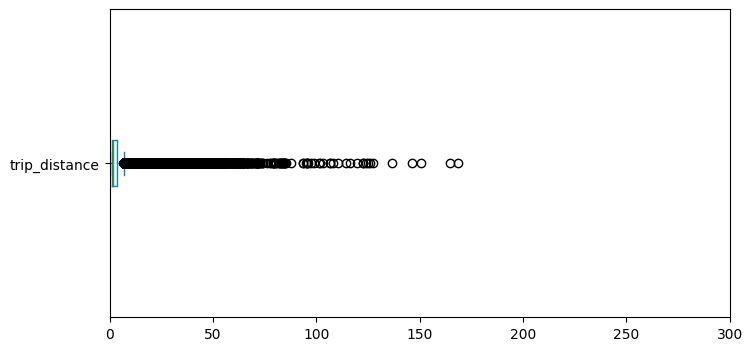

In [18]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# df.describe(percentiles=[0.01, 0.05, 0.95, 0.99]).T

plt.figure(figsize=(8,4))
df["trip_distance"].plot(kind="box", vert=False, xlim=(0,300))
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [19]:
# remove passenger_count > 6
len(df)
df = df[df["passenger_count"] <= 6]
# len(df)

In [20]:
# Continue with outlier handling
df = df[~((df["trip_distance"] <= 0.1) & (df["fare_amount"] > 300))] # remove rows where trip_distance <= 0.1 and fare_amount > 300

#Drop rows where trip_distance=0 & fare_amount=0 but PU != DO
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

#Drop rows where trip_distance > 250 miles
df = df[df["trip_distance"] <= 250]

#Replace payment_type=0 or invalid with NaN
df.loc[~df["payment_type"].isin([1,2,3,4,5,6]), "payment_type"] = np.nan

df.loc[~df["mta_tax"].isin([0.0, 0.5]), "mta_tax"] = 0.5
df.loc[df["improvement_surcharge"] != 1.0, "improvement_surcharge"] = 1.0
df.loc[~df["congestion_surcharge"].isin([0.0, 2.5]), "congestion_surcharge"] = 0.0
df.loc[~df["airport_fee"].isin([0.0, 1.75]), "airport_fee"] = 0.0

df = df.reset_index(drop=True)

In [21]:
# Do any columns need standardising?

cat_cols = ["VendorID", "RatecodeID", "payment_type", "store_and_fwd_flag"]
df[cat_cols] = df[cat_cols].astype("category")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896222 entries, 0 to 1896221
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           category      
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [22]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [23]:
categorical_vars = [
    "VendorID", "RatecodeID", "store_and_fwd_flag", 
    "PULocationID", "DOLocationID", "payment_type"
]

datetime_vars = [
    "tpep_pickup_datetime", "tpep_dropoff_datetime"
]

numerical_vars = [
    "passenger_count", "trip_distance", "fare_amount", "extra", "mta_tax", 
    "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", 
    "congestion_surcharge", "airport_fee"
]


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

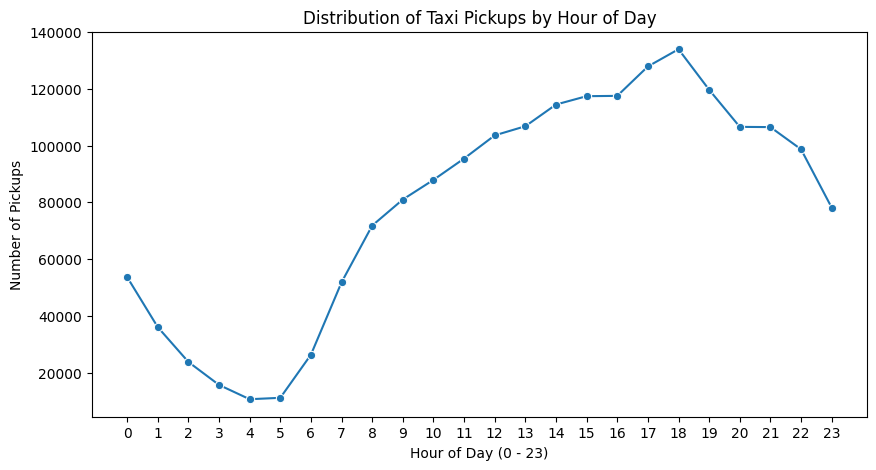

In [24]:
# Find and show the hourly trends in taxi pickups
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
hourly_counts = df["pickup_hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
plt.title("Distribution of Taxi Pickups by Hour of Day")
plt.xlabel("Hour of Day (0 - 23)")
plt.ylabel("Number of Pickups")
plt.xticks(range(0,24))
plt.show()

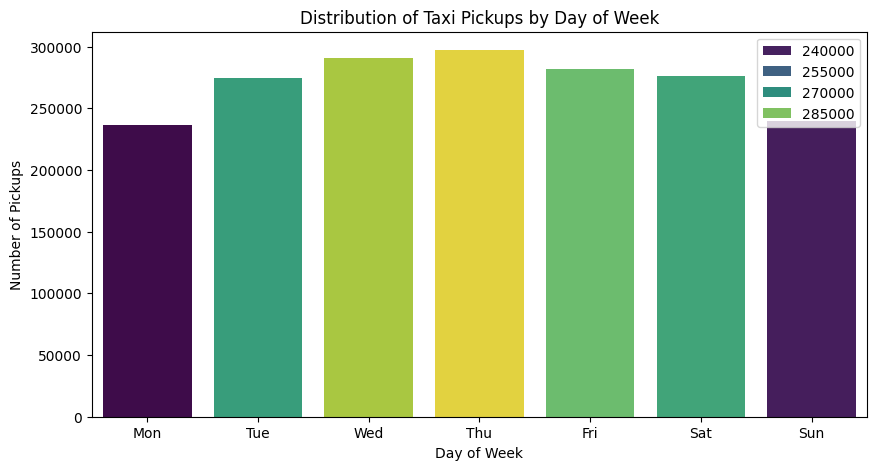

In [25]:
# Find and show the daily trends in taxi pickups (days of the week)
df["pickup_dayofweek"] = df["tpep_pickup_datetime"].dt.dayofweek 
dayofweek_counts = df["pickup_dayofweek"].value_counts().sort_index()
dayofweek_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

plt.figure(figsize=(10,5))
sns.barplot(x=dayofweek_labels, y=dayofweek_counts.values, palette="viridis", hue=dayofweek_counts.values)
plt.title("Distribution of Taxi Pickups by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.show()

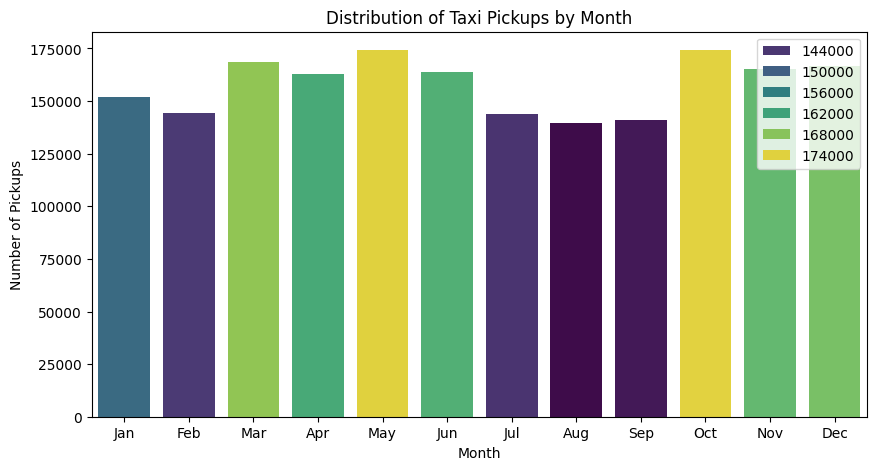

In [26]:
# Show the monthly trends in pickups

df["pickup_month"] = df["tpep_pickup_datetime"].dt.month
month_counts = df["pickup_month"].value_counts().sort_index()
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(10,5))
sns.barplot(x=month_labels, y=month_counts.values, palette="viridis", hue=month_counts.values)
plt.title("Distribution of Taxi Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [27]:
# Analyse the above parameters

cols_to_check = ["trip_distance", "fare_amount", "tip_amount", "total_amount"]

for col in cols_to_check:
  invalid_count = (df[col] <= 0).sum()
  total_count = len(df)
  print(f"{col}: {invalid_count} invalid values ({invalid_count/total_count:.2%} of total)")


trip_distance: 36412 invalid values (1.92% of total)
fare_amount: 593 invalid values (0.03% of total)
tip_amount: 434717 invalid values (22.93% of total)
total_amount: 355 invalid values (0.02% of total)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [28]:
# Create a df with non zero entries for the selected parameters.

non_zero_df = df[
    (df["trip_distance"] > 0) &
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0) &
    (df["tip_amount"] >= 0) 
].copy()
non_zero_df.head(10)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_dayofweek,pickup_month
0,2,2023-01-01 00:00:57,2023-01-01 00:15:11,1.0,9.98,1.0,N,138,97,1.0,...,0.5,5.00,0.00,1.0,51.75,0.0,0.0,0,6,1
1,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1.0,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,0,6,1
2,2,2023-01-01 00:03:01,2023-01-01 00:10:15,1.0,1.25,1.0,N,141,236,1.0,...,0.5,0.72,0.00,1.0,15.02,2.5,0.0,0,6,1
3,1,2023-01-01 00:03:48,2023-01-01 00:17:51,1.0,6.00,1.0,N,137,25,1.0,...,0.5,5.47,0.00,1.0,35.87,2.5,0.0,0,6,1
4,1,2023-01-01 00:04:34,2023-01-01 00:17:32,1.0,1.60,1.0,N,125,186,1.0,...,0.5,3.00,0.00,1.0,20.80,2.5,0.0,0,6,1
5,2,2023-01-01 00:04:42,2023-01-01 00:13:09,3.0,1.13,1.0,N,142,239,2.0,...,0.5,0.00,0.00,1.0,15.00,2.5,0.0,0,6,1
6,2,2023-01-01 00:04:44,2023-01-01 00:20:05,1.0,2.47,1.0,N,237,107,1.0,...,0.5,6.18,0.00,1.0,26.78,2.5,0.0,0,6,1
7,2,2023-01-01 00:04:55,2023-01-01 00:10:20,1.0,0.87,1.0,N,142,239,1.0,...,0.5,2.44,0.00,1.0,14.64,2.5,0.0,0,6,1
8,2,2023-01-01 00:05:12,2023-01-01 00:16:24,1.0,1.83,1.0,N,148,107,1.0,...,0.5,6.84,0.00,1.0,23.94,2.5,0.0,0,6,1
9,2,2023-01-01 00:05:24,2023-01-01 00:33:50,1.0,14.44,1.0,N,162,3,1.0,...,0.5,0.10,0.00,1.0,61.30,2.5,0.0,0,6,1


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

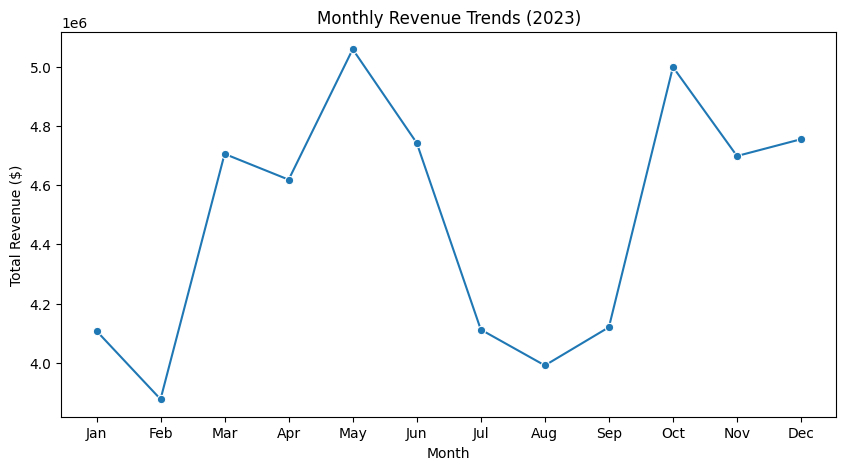

In [29]:

non_zero_df["pickup_month"] = non_zero_df["tpep_pickup_datetime"].dt.month
monthly_revenue = non_zero_df.groupby("pickup_month")["total_amount"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker="o")
plt.xticks(range(1,13), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Monthly Revenue Trends (2023)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

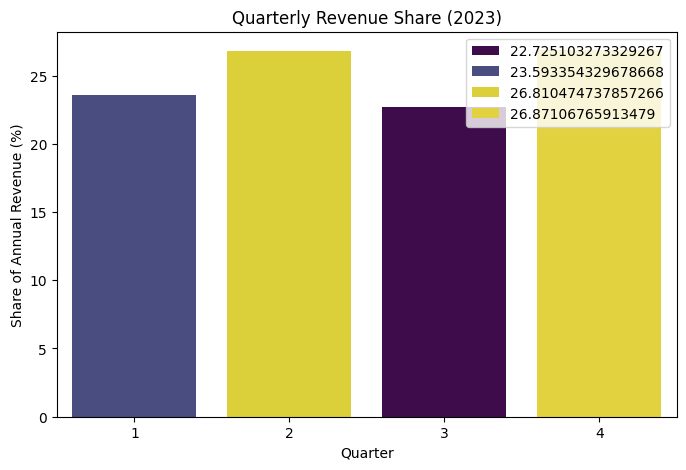

(pickup_quarter
 1    12689859.79
 2    14420211.75
 3    12222864.55
 4    14452802.10
 Name: total_amount, dtype: float64,
 pickup_quarter
 1    23.593354
 2    26.810475
 3    22.725103
 4    26.871068
 Name: total_amount, dtype: float64)

In [30]:
non_zero_df["pickup_month"] = non_zero_df["tpep_pickup_datetime"].dt.month

non_zero_df["pickup_quarter"] = non_zero_df["pickup_month"].map({1:1, 2:1, 3:1,
                                                           4:2, 5:2, 6:2,
                                                           7:3, 8:3, 9:3,
                                                           10:4, 11:4, 12:4})

quarterly_revenue = non_zero_df.groupby("pickup_quarter")["total_amount"].sum()

quarterly_share = (quarterly_revenue / quarterly_revenue.sum()) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=quarterly_share.index, y=quarterly_share.values, palette="viridis", hue=quarterly_share.values)
plt.title("Quarterly Revenue Share (2023)")
plt.xlabel("Quarter")
plt.ylabel("Share of Annual Revenue (%)")
plt.show()

quarterly_revenue, quarterly_share



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

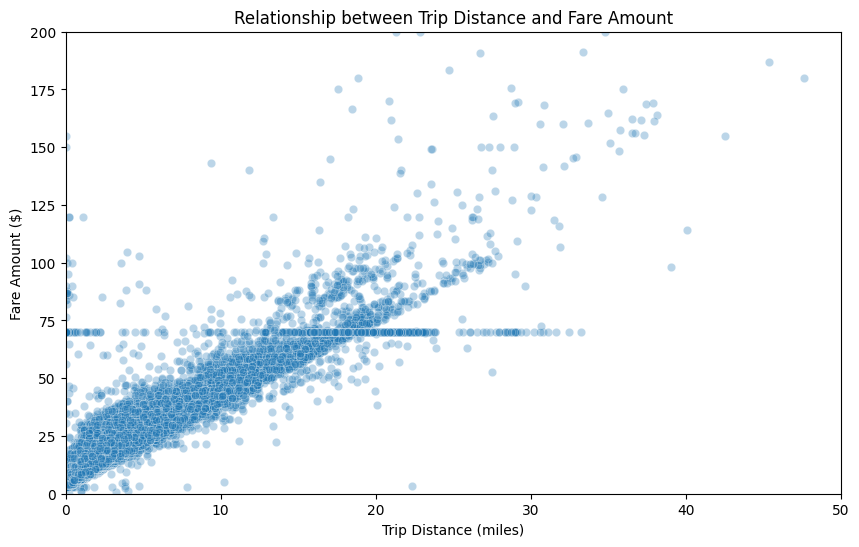

In [31]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10,6))
sns.scatterplot(data=non_zero_df.sample(50000, random_state=42),  # sample for readability
                x="trip_distance", y="fare_amount", alpha=0.3)

plt.title("Relationship between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, 200)   # zoom in to ignore extreme outliers
plt.xlim(0, 50)    # most trips are under 50 miles
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

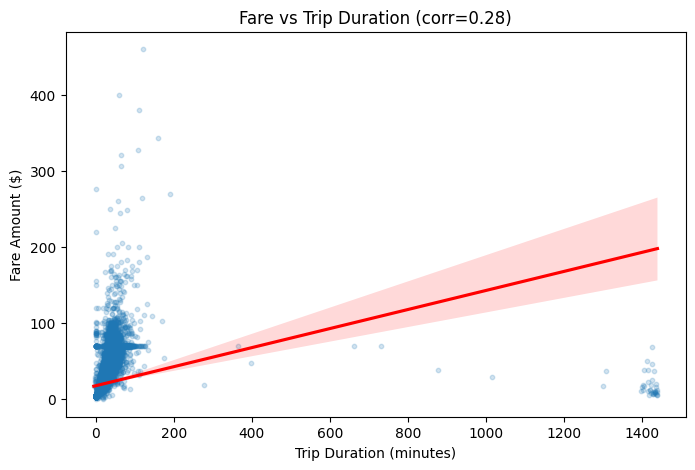

In [32]:
# Show relationship between fare and trip duration
non_zero_df["trip_duration"] = (
    (non_zero_df["tpep_dropoff_datetime"] - non_zero_df["tpep_pickup_datetime"]).dt.total_seconds() / 60
)

corr1 = non_zero_df[["fare_amount", "trip_duration"]].corr().iloc[0,1]
plt.figure(figsize=(8,5))
sns.regplot(data=non_zero_df.sample(50000, random_state=42),
            x="trip_duration", y="fare_amount",
            scatter_kws={'alpha':0.2, 's':10}, line_kws={'color':'red'})
plt.title(f"Fare vs Trip Duration (corr={corr1:.2f})")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.show()

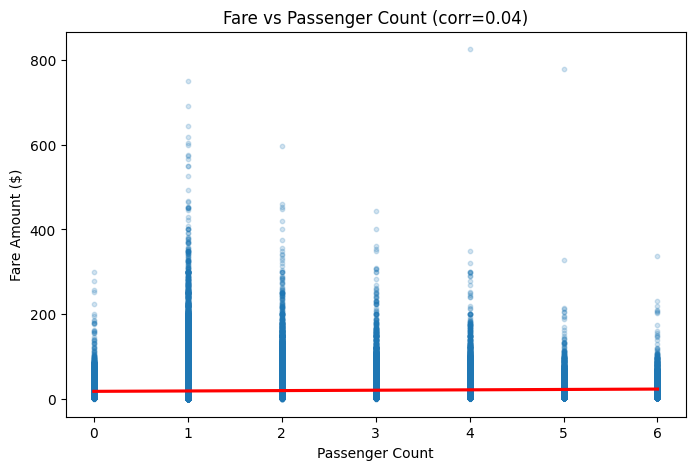

In [41]:
# Show relationship between fare and number of passengers
corr2 = non_zero_df[["fare_amount", "passenger_count"]].corr().iloc[0,1]
plt.figure(figsize=(8,5))
sns.regplot(data=non_zero_df, 
            x="passenger_count", y="fare_amount",
            scatter_kws={'alpha':0.2, 's':10}, line_kws={'color':'red'})
plt.title(f"Fare vs Passenger Count (corr={corr2:.2f})")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.show()


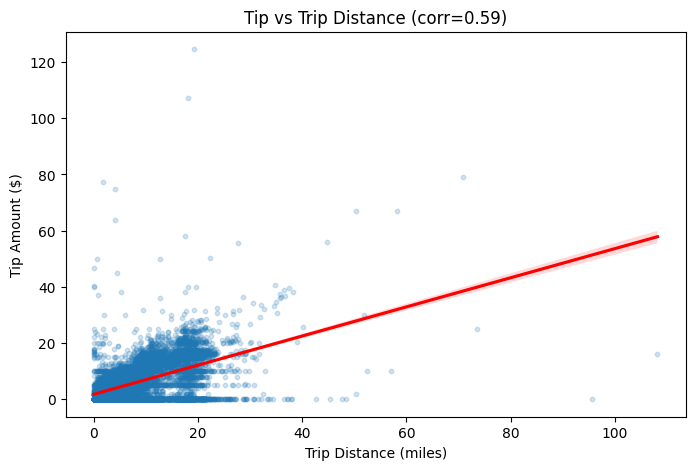

In [40]:
# Show relationship between tip and trip distance
corr3 = non_zero_df[["tip_amount", "trip_distance"]].corr().iloc[0,1]
plt.figure(figsize=(8,5))
sns.regplot(data=non_zero_df.sample(50000, random_state=42),
            x="trip_distance", y="tip_amount",
            scatter_kws={'alpha':0.2, 's':10}, line_kws={'color':'red'})
plt.title(f"Tip vs Trip Distance (corr={corr3:.2f})")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

/tmp/ipykernel_38576/1737122647.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_zero_df["payment_type_label"].fillna("Missing", inplace=True)


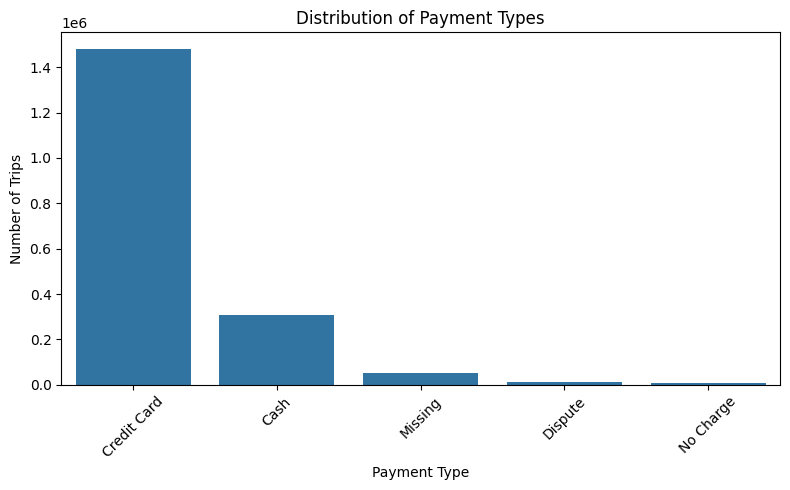

payment_type_label
Credit Card    79.59
Cash           16.67
Missing         2.72
Dispute         0.65
No Charge       0.37
Name: proportion, dtype: float64


In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_map = {
    0: "Flex Fare",
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

non_zero_df["payment_type_label"] = (
    non_zero_df["payment_type"]
    .dropna()
    .astype(int)
    .map(payment_map)
)

non_zero_df["payment_type_label"].fillna("Missing", inplace=True)

plt.figure(figsize=(8,5))
sns.countplot(data=non_zero_df, x="payment_type_label", order=non_zero_df["payment_type_label"].value_counts().index)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_counts = non_zero_df["payment_type_label"].value_counts(normalize=True) * 100
print(payment_counts.round(2))



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [48]:
# !pip install geopandas
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [49]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("./taxi_zones/taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

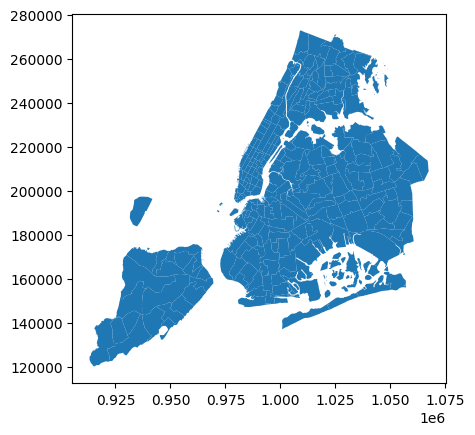

In [50]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [51]:
# Merge zones and trip records using locationID and PULocationID

zone_gdf_renamed = zones.rename(columns={"LocationID": "PULocationID",
                                            "zone": "PU_zone",
                                            "borough": "PU_borough"})

trips_with_pu_zone = non_zero_df.merge(zone_gdf_renamed[["PULocationID", "PU_zone", "PU_borough"]],
                                    on="PULocationID",
                                    how="left")

trips_with_pu_zone[["PULocationID", "PU_zone", "PU_borough"]].head()


,PULocationID,PU_zone,PU_borough
0,138,LaGuardia Airport,Queens
1,132,JFK Airport,Queens
2,141,Lenox Hill West,Manhattan
3,137,Kips Bay,Manhattan
4,125,Hudson Sq,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [52]:
# Group data by location and calculate the number of trips
pickup_counts = non_zero_df.groupby("PULocationID").size().reset_index(name="trip_count")

pickup_counts.head()



,PULocationID,trip_count
0,1,59
1,2,2
2,3,33
3,4,2175
4,5,18


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [53]:
# Merge trip counts back to the zones GeoDataFrame
zone_gdf_with_counts = zones.merge(pickup_counts,
                                      left_on="LocationID",
                                      right_on="PULocationID",
                                      how="left")

zone_gdf_with_counts["trip_count"] = zone_gdf_with_counts["trip_count"].fillna(0).astype(int)
zone_gdf_with_counts[["LocationID", "zone", "borough", "trip_count"]].head()



,LocationID,zone,borough,trip_count
0,1,Newark Airport,EWR,59
1,2,Jamaica Bay,Queens,2
2,3,Allerton/Pelham Gardens,Bronx,33
3,4,Alphabet City,Manhattan,2175
4,5,Arden Heights,Staten Island,18


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

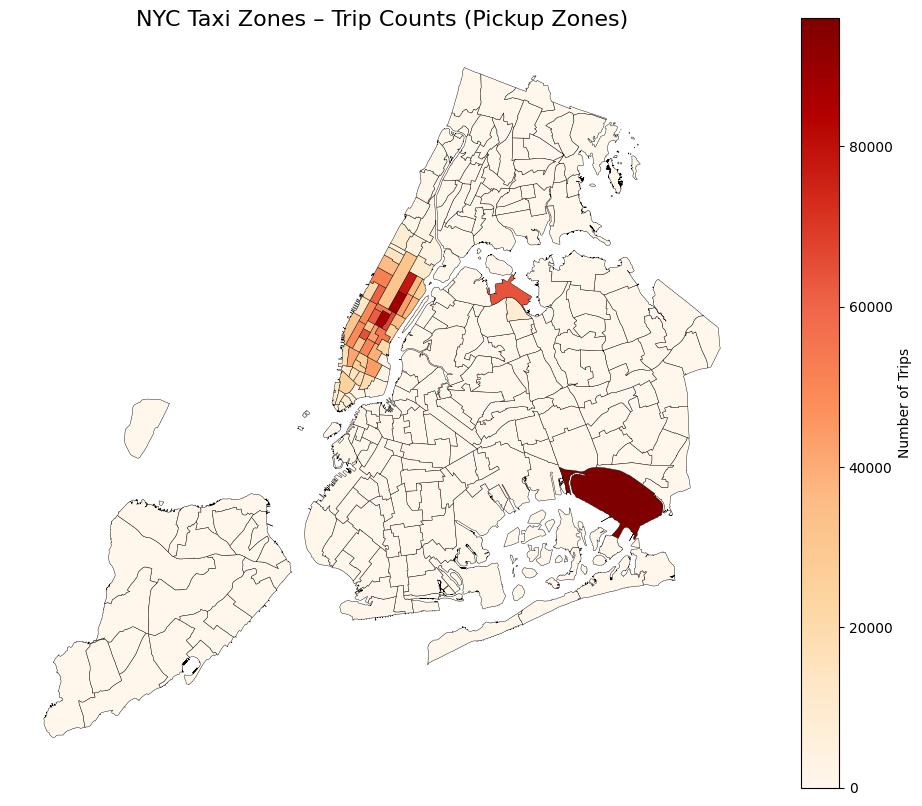

In [54]:
# Define figure and axis


# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zone_gdf_with_counts.plot(
    column="trip_count",       # Column to color by
    ax=ax,                     # Plot on this axis
    cmap="OrRd",               # Color map (Orange-Red)
    legend=True,               # Show legend
    legend_kwds={
        "label": "Number of Trips",
        "orientation": "vertical"
    },
    edgecolor="black",         # Black borders
    linewidth=0.3              # Thin borders
)

ax.axis("off")
plt.title("NYC Taxi Zones – Trip Counts (Pickup Zones)", fontsize=16)
plt.show()



In [55]:
# can you try displaying the zones DF sorted by the number of trips?

top_zones = zone_gdf_with_counts.sort_values(by="trip_count", ascending=False)
top_zones[["LocationID", "zone", "borough", "trip_count"]].head(10)

,LocationID,zone,borough,trip_count
131,132,JFK Airport,Queens,96066
236,237,Upper East Side South,Manhattan,88105
160,161,Midtown Center,Manhattan,86398
235,236,Upper East Side North,Manhattan,78304
161,162,Midtown East,Manhattan,66501
185,186,Penn Station/Madison Sq West,Manhattan,64313
137,138,LaGuardia Airport,Queens,64079
229,230,Times Sq/Theatre District,Manhattan,61858
141,142,Lincoln Square East,Manhattan,61145
169,170,Murray Hill,Manhattan,55470


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [56]:
# Find routes which have the slowest speeds at different times of the day
non_zero_df["trip_duration_min"] = (non_zero_df["tpep_dropoff_datetime"] - non_zero_df["tpep_pickup_datetime"]).dt.total_seconds() / 60
non_zero_df["trip_duration_hr"] = non_zero_df["trip_duration_min"] / 60

valid_trips = non_zero_df[
    (non_zero_df["trip_distance"] >= 0.5) &
    (non_zero_df["trip_duration_min"] >= 1) &
    (non_zero_df["trip_duration_hr"] > 0) &
    (non_zero_df["trip_speed_mph"] <= 100 if "trip_speed_mph" in non_zero_df else True)
].copy()

valid_trips["pickup_hour"] = valid_trips["tpep_pickup_datetime"].dt.hour

route_hourly = (
    valid_trips.groupby(["PULocationID", "DOLocationID", "pickup_hour"])
    .agg(
        avg_distance=("trip_distance", "mean"),
        avg_duration_hr=("trip_duration_hr", "mean"),
        trip_count=("trip_distance", "count")
    )
    .reset_index()
)

route_hourly["avg_speed_mph"] = route_hourly["avg_distance"] / route_hourly["avg_duration_hr"]

route_hourly = route_hourly[route_hourly["trip_count"] >= 50]

slowest_routes_by_hour = route_hourly.sort_values("avg_speed_mph").head(10)

slowest_routes_by_hour



,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration_hr,trip_count,avg_speed_mph
44305,114,249,21,0.991831,0.794933,71,1.247691
37593,100,230,10,0.774182,0.591540,55,1.308756
110724,234,114,23,1.160794,0.876424,63,1.324466
37605,100,230,22,0.836786,0.580441,56,1.441637
37251,100,170,13,0.910377,0.626719,53,1.452608
37252,100,170,14,0.919231,0.626779,52,1.466595
111191,234,164,19,0.918673,0.622191,98,1.476513
88034,170,164,10,0.883208,0.576824,53,1.531156
131436,263,262,21,0.722131,0.462400,61,1.561703
110699,234,113,22,0.836727,0.516828,55,1.618966


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

/tmp/ipykernel_38576/561361041.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette="crest")


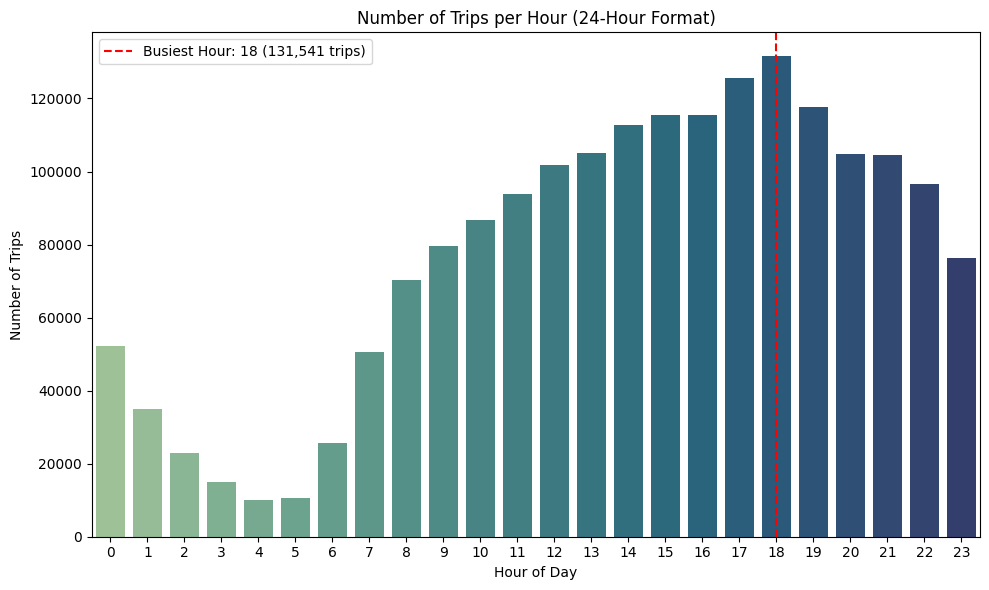

🚕 Busiest hour of the day: 18:00 with 131,541 trips


In [57]:
# Visualise the number of trips per hour and find the busiest hour
non_zero_df["pickup_hour"] = non_zero_df["tpep_pickup_datetime"].dt.hour

hourly_trip_counts = non_zero_df["pickup_hour"].value_counts().sort_index()
busiest_hour = hourly_trip_counts.idxmax()
busiest_count = hourly_trip_counts.max()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette="crest")
plt.title("Number of Trips per Hour (24-Hour Format)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.axvline(busiest_hour, color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour} ({busiest_count:,} trips)")
plt.legend()
plt.tight_layout()
plt.show()

print(f"🚕 Busiest hour of the day: {busiest_hour}:00 with {busiest_count:,} trips")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [58]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
hourly_trip_counts = non_zero_df["pickup_hour"].value_counts().sort_values(ascending=False)

top_5_hours = hourly_trip_counts.head(5)

scaled_top_5 = (top_5_hours / sample_fraction).astype(int)
print(scaled_top_5)



pickup_hour
18    2630820
17    2510880
19    2352460
15    2307640
16    2307480
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 1000x600 with 0 Axes>

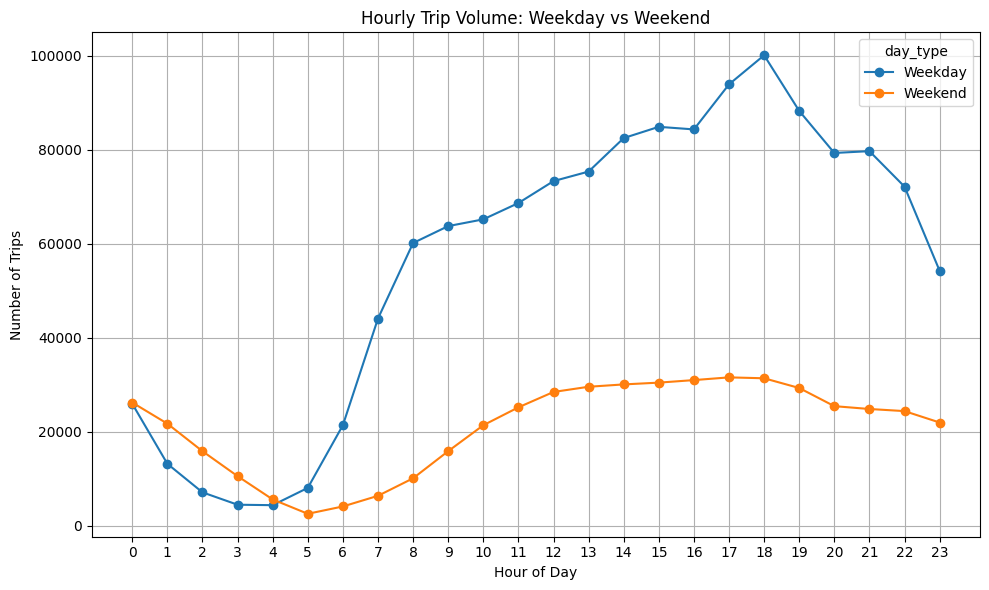

In [59]:
# Compare traffic trends for the week days and weekends

non_zero_df["pickup_hour"] = non_zero_df["tpep_pickup_datetime"].dt.hour
non_zero_df["pickup_dayofweek"] = non_zero_df["tpep_pickup_datetime"].dt.dayofweek

non_zero_df["day_type"] = non_zero_df["pickup_dayofweek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

hourly_comparison = (
    non_zero_df.groupby(["day_type", "pickup_hour"])
    .size()
    .reset_index(name="trip_count")
)

pivot_hourly = hourly_comparison.pivot(index="pickup_hour", columns="day_type", values="trip_count").fillna(0)

plt.figure(figsize=(10, 6))
pivot_hourly.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Hourly Trip Volume: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

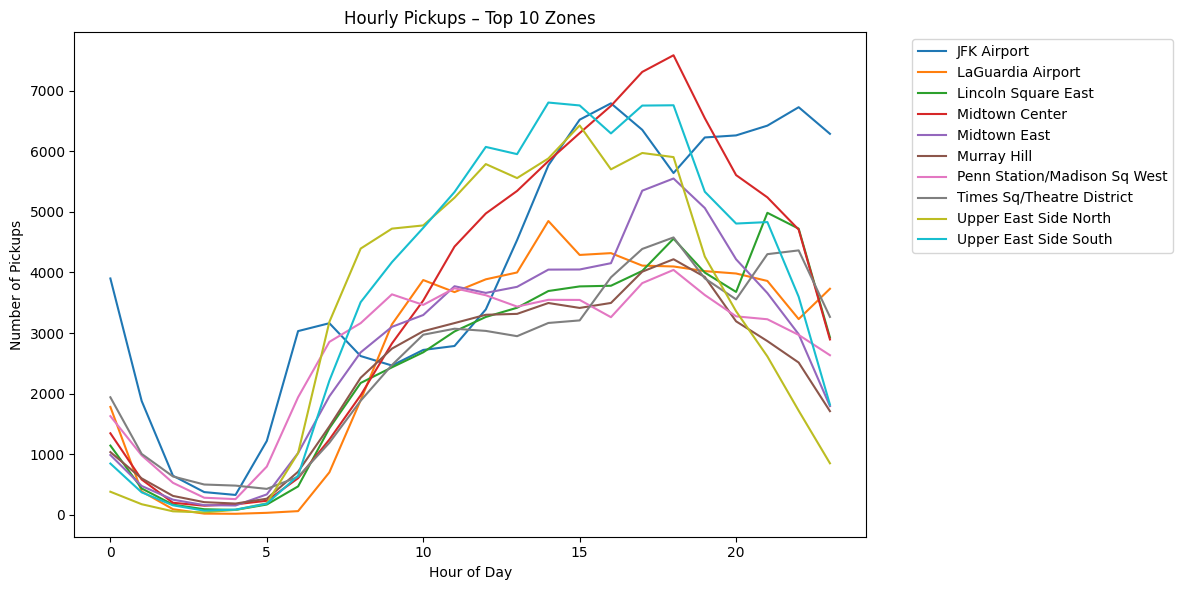

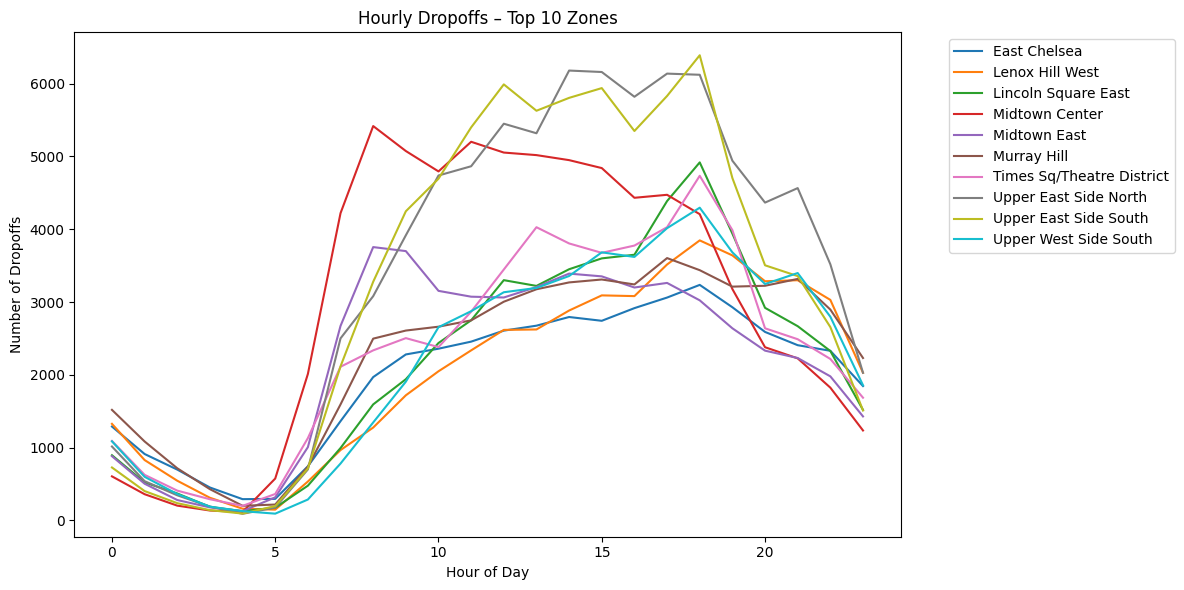

In [60]:
# Find top 10 pickup and dropoff zones

non_zero_df["pickup_hour"] = non_zero_df["tpep_pickup_datetime"].dt.hour
top10_pu_zones = (
    non_zero_df["PULocationID"]
    .value_counts()
    .head(10)
    .index.tolist()
)

top10_do_zones = (
    non_zero_df["DOLocationID"]
    .value_counts()
    .head(10)
    .index.tolist()
)

pu_hourly = (
    non_zero_df[non_zero_df["PULocationID"].isin(top10_pu_zones)]
    .groupby(["PULocationID", "pickup_hour"])
    .size()
    .reset_index(name="pickup_count")
)

do_hourly = (
    non_zero_df[non_zero_df["DOLocationID"].isin(top10_do_zones)]
    .groupby(["DOLocationID", "pickup_hour"])
    .size()
    .reset_index(name="dropoff_count")
)

pu_hourly = (
    non_zero_df[non_zero_df["PULocationID"].isin(top10_pu_zones)]
    .groupby(["PULocationID", "pickup_hour"])
    .size()
    .reset_index(name="pickup_count")
)

do_hourly = (
    non_zero_df[non_zero_df["DOLocationID"].isin(top10_do_zones)]
    .groupby(["DOLocationID", "pickup_hour"])
    .size()
    .reset_index(name="dropoff_count")
)

zone_lookup = zones.set_index("LocationID")["zone"].to_dict()

pu_hourly["PU_zone"] = pu_hourly["PULocationID"].map(zone_lookup)
pu_hourly["PU_borough"] = pu_hourly["PULocationID"].map(zone_lookup)
do_hourly["DO_zone"] = do_hourly["DOLocationID"].map(zone_lookup)
do_hourly["DO_borough"] = do_hourly["DOLocationID"].map(zone_lookup)

plt.figure(figsize=(12, 6))
sns.lineplot(data=pu_hourly, x="pickup_hour", y="pickup_count", hue="PU_zone")
plt.title("Hourly Pickups – Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data=do_hourly, x="pickup_hour", y="dropoff_count", hue="DO_zone")
plt.title("Hourly Dropoffs – Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [61]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = non_zero_df["PULocationID"].value_counts().reset_index()
pickup_counts.columns = ["LocationID", "pickup_count"]

dropoff_counts = non_zero_df["DOLocationID"].value_counts().reset_index()
dropoff_counts.columns = ["LocationID", "dropoff_count"]

zone_activity = pd.merge(pickup_counts, dropoff_counts, on="LocationID", how="outer").fillna(0)

zone_activity["pickup_dropoff_ratio"] = zone_activity["pickup_count"] / (zone_activity["dropoff_count"] + 1e-6)

zone_activity["zone"] = zone_activity["LocationID"].map(zone_lookup)

top_10 = zone_activity.sort_values("pickup_dropoff_ratio", ascending=False).head(10)
bottom_10 = zone_activity.sort_values("pickup_dropoff_ratio", ascending=True).head(10)

display(top_10[["LocationID", "zone", "pickup_count", "dropoff_count", "pickup_dropoff_ratio"]])
display(bottom_10[["LocationID", "zone", "pickup_count", "dropoff_count", "pickup_dropoff_ratio"]])


,LocationID,zone,pickup_count,dropoff_count,pickup_dropoff_ratio
195,199,Rikers Island,1.0,0.0,1000000.000000
69,70,East Elmhurst,8266.0,923.0,8.955580
128,132,JFK Airport,96066.0,21522.0,4.463619
134,138,LaGuardia Airport,64079.0,24079.0,2.661199
1,2,Jamaica Bay,2.0,1.0,1.999998
182,186,Penn Station/Madison Sq West,64313.0,40791.0,1.576647
110,114,Greenwich Village South,24840.0,17799.0,1.395584
42,43,Central Park,31258.0,22784.0,1.371928
245,249,West Village,41688.0,31007.0,1.344471
158,162,Midtown East,66501.0,52757.0,1.260515


,LocationID,zone,pickup_count,dropoff_count,pickup_dropoff_ratio
107,111,Green-Wood Cemetery,0.0,14.0,0.000000
183,187,Port Richmond,0.0,15.0,0.000000
172,176,Oakwood,0.0,17.0,0.000000
168,172,New Dorp/Midland Beach,0.0,15.0,0.000000
241,245,West Brighton,0.0,25.0,0.000000
0,1,Newark Airport,59.0,5374.0,0.010979
57,58,Country Club,1.0,51.0,0.019608
217,221,Stapleton,1.0,48.0,0.020833
152,156,Mariners Harbor,1.0,30.0,0.033333
116,120,Highbridge Park,4.0,104.0,0.038462


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [62]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = list(range(0, 6)) + [23]  # 0–5 AM and 11 PM

non_zero_df["pickup_hour"] = non_zero_df["tpep_pickup_datetime"].dt.hour

night_trips = non_zero_df[non_zero_df["pickup_hour"].isin(night_hours)].copy()

night_pu_counts = night_trips["PULocationID"].value_counts().reset_index()
night_pu_counts.columns = ["LocationID", "night_pickups"]
night_pu_counts["zone"] = night_pu_counts["LocationID"].map(zone_lookup)

night_do_counts = night_trips["DOLocationID"].value_counts().reset_index()
night_do_counts.columns = ["LocationID", "night_dropoffs"]
night_do_counts["zone"] = night_do_counts["LocationID"].map(zone_lookup)

display(night_pu_counts.head(10))

display(night_do_counts.head(10))


,LocationID,night_pickups,zone
0,79,15861,East Village
1,132,14643,JFK Airport
2,249,12939,West Village
3,48,10540,Clinton East
4,148,9994,Lower East Side
5,114,9135,Greenwich Village South
6,230,8266,Times Sq/Theatre District
7,186,7121,Penn Station/Madison Sq West
8,164,6341,Midtown South
9,68,6144,East Chelsea


,LocationID,night_dropoffs,zone
0,79,8547,East Village
1,48,7095,Clinton East
2,170,6403,Murray Hill
3,107,5843,Gramercy
4,68,5791,East Chelsea
5,141,5354,Lenox Hill West
6,263,5246,Yorkville West
7,249,5100,West Village
8,230,4672,Times Sq/Theatre District
9,229,4447,Sutton Place/Turtle Bay North


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [63]:
# Filter for night hours (11 PM to 5 AM)

non_zero_df["pickup_hour"] = non_zero_df["tpep_pickup_datetime"].dt.hour

night_hours = list(range(0, 6)) + [23]
is_night = non_zero_df["pickup_hour"].isin(night_hours)

total_revenue = non_zero_df["fare_amount"].sum()

night_revenue = non_zero_df.loc[is_night, "fare_amount"].sum()
day_revenue = non_zero_df.loc[~is_night, "fare_amount"].sum()

night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

/tmp/ipykernel_38576/3226098494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fare_per_mile, x="passenger_count", y="fare_per_mile", palette="viridis")


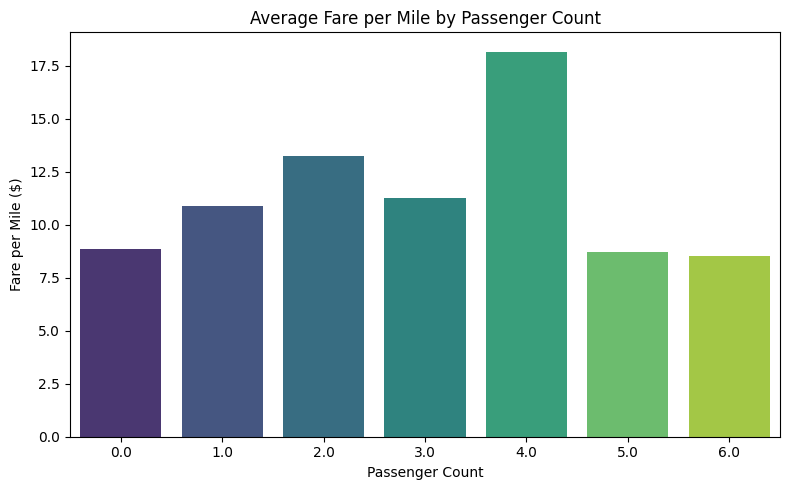

In [64]:
# Analyse the fare per mile per passenger for different passenger counts


fare_per_mile_df = non_zero_df[(non_zero_df["trip_distance"] > 0) & (non_zero_df["fare_amount"] > 0)].copy()
fare_per_mile_df["fare_per_mile"] = fare_per_mile_df["fare_amount"] / fare_per_mile_df["trip_distance"]
avg_fare_per_mile = fare_per_mile_df.groupby("passenger_count")["fare_per_mile"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_fare_per_mile, x="passenger_count", y="fare_per_mile", palette="viridis")
plt.title("Average Fare per Mile by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile ($)")
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

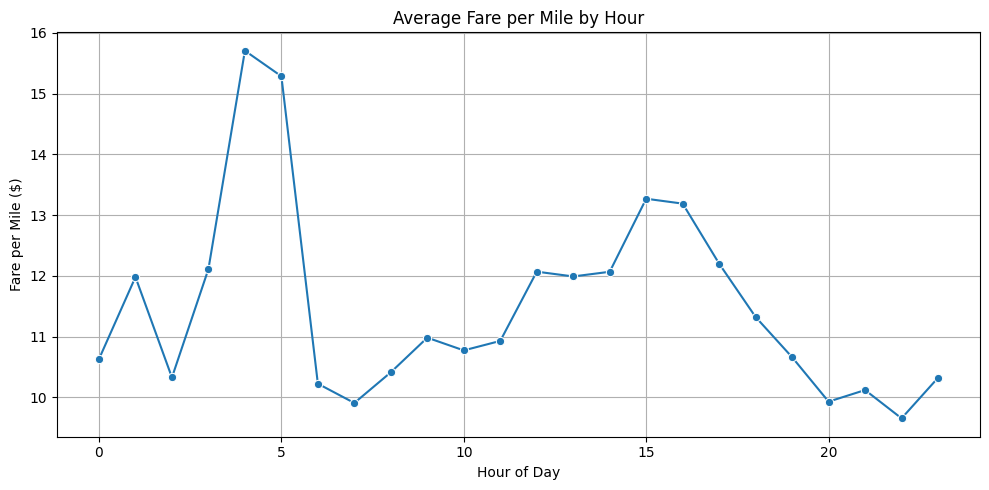

/tmp/ipykernel_38576/3387153446.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_fare, x="pickup_dayofweek", y="fare_per_mile", palette="mako")


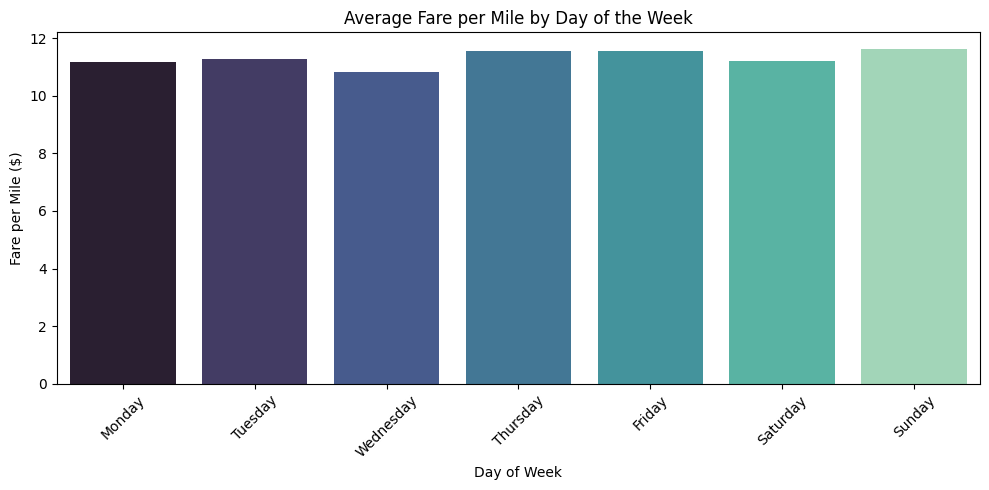

In [65]:
# Compare the average fare per mile for different days and for different times of the day
valid_fare_df = non_zero_df[(non_zero_df["trip_distance"] > 0) & (non_zero_df["fare_amount"] > 0)].copy()
valid_fare_df["fare_per_mile"] = valid_fare_df["fare_amount"] / valid_fare_df["trip_distance"]
valid_fare_df["pickup_hour"] = valid_fare_df["tpep_pickup_datetime"].dt.hour
valid_fare_df["pickup_dayofweek"] = valid_fare_df["tpep_pickup_datetime"].dt.day_name()

hourly_fare = valid_fare_df.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()
daily_fare = valid_fare_df.groupby("pickup_dayofweek")["fare_per_mile"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_fare, x="pickup_hour", y="fare_per_mile", marker="o")
plt.title("Average Fare per Mile by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fare per Mile ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=daily_fare, x="pickup_dayofweek", y="fare_per_mile", palette="mako")
plt.title("Average Fare per Mile by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Fare per Mile ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

/tmp/ipykernel_38576/3883352981.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_by_vendor = vendor_fare_df.groupby("VendorID")["fare_per_mile"].mean().reset_index()
/tmp/ipykernel_38576/3883352981.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fare_by_vendor, x="VendorID", y="fare_per_mile", palette="Set2")


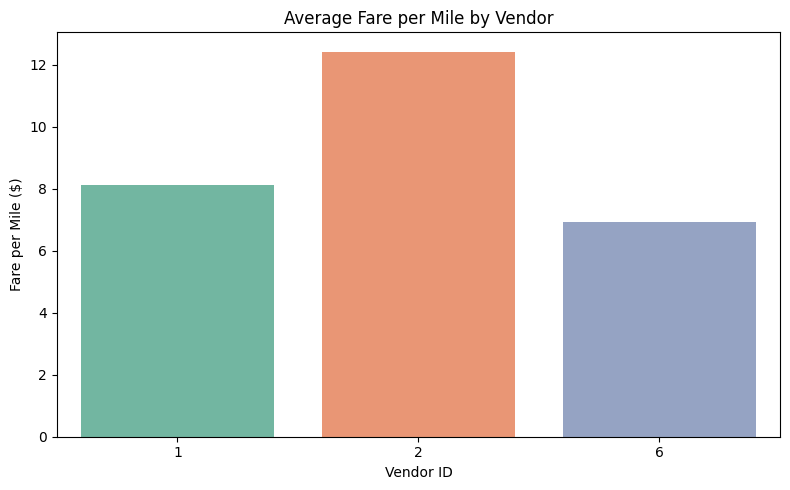

In [66]:
# Compare fare per mile for different vendors
vendor_fare_df = non_zero_df[(non_zero_df["trip_distance"] > 0) & (non_zero_df["fare_amount"] > 0)].copy()
vendor_fare_df["fare_per_mile"] = vendor_fare_df["fare_amount"] / vendor_fare_df["trip_distance"]
avg_fare_by_vendor = vendor_fare_df.groupby("VendorID")["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_fare_by_vendor, x="VendorID", y="fare_per_mile", palette="Set2")
plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Fare per Mile ($)")
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


/tmp/ipykernel_38576/3991759171.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_tier_vendor = tiered_df.groupby(["distance_tier", "VendorID"])["fare_per_mile"].mean().reset_index()


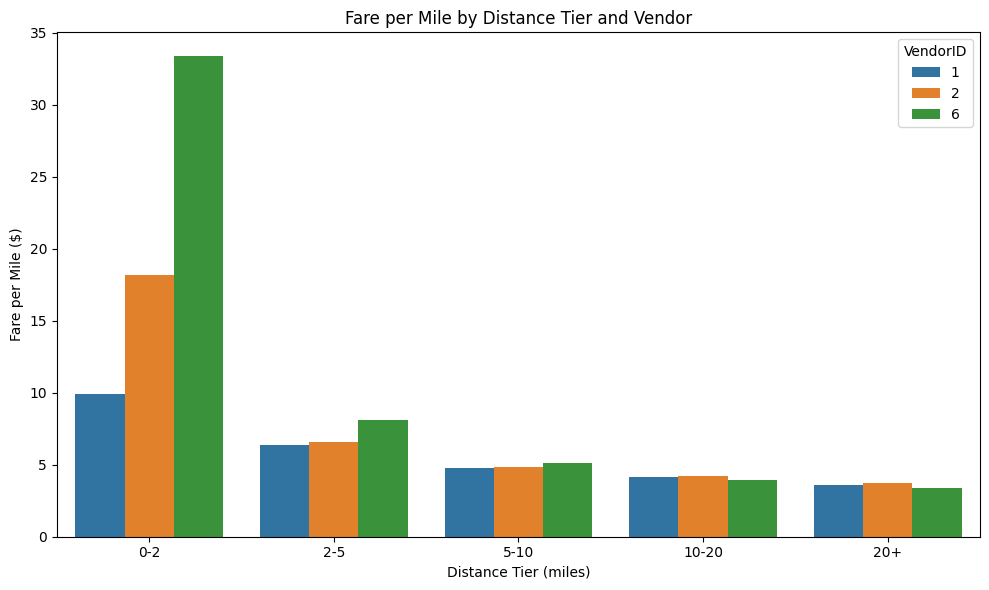

In [67]:
# Defining distance tiers
distance_tiers = pd.cut(non_zero_df["trip_distance"], bins=[0, 2, 5, 10, 20, float("inf")], labels=["0-2", "2-5", "5-10", "10-20", "20+"])
tiered_df = non_zero_df[(non_zero_df["trip_distance"] > 0) & (non_zero_df["fare_amount"] > 0)].copy()
tiered_df["distance_tier"] = distance_tiers
tiered_df["fare_per_mile"] = tiered_df["fare_amount"] / tiered_df["trip_distance"]

avg_fare_tier_vendor = tiered_df.groupby(["distance_tier", "VendorID"])["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_fare_tier_vendor, x="distance_tier", y="fare_per_mile", hue="VendorID", palette="tab10")
plt.title("Fare per Mile by Distance Tier and Vendor")
plt.xlabel("Distance Tier (miles)")
plt.ylabel("Fare per Mile ($)")
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

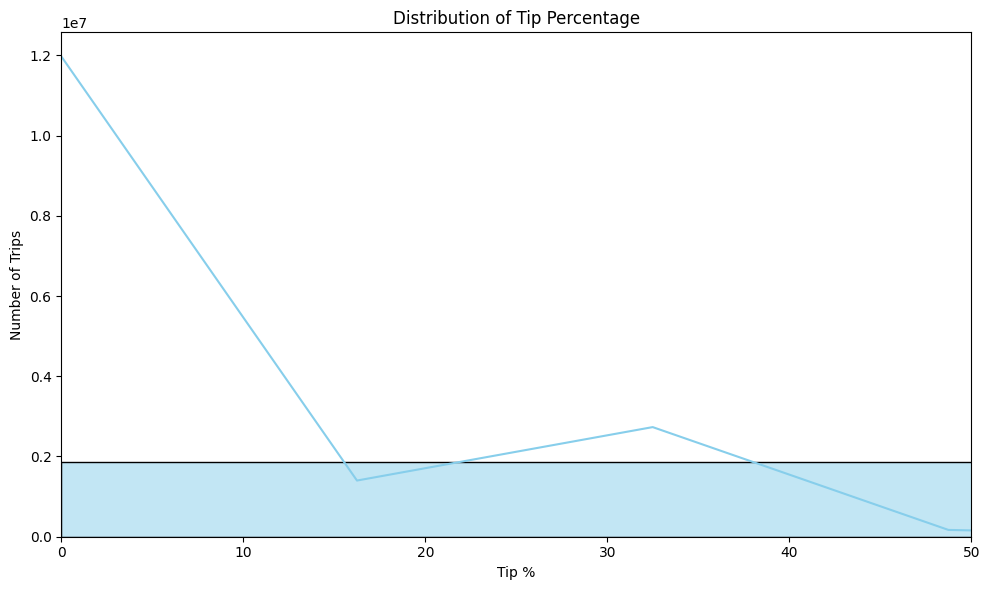

In [68]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

tip_df = non_zero_df[(non_zero_df["fare_amount"] > 0) & (non_zero_df["tip_amount"] >= 0)].copy()
tip_df["tip_percent"] = (tip_df["tip_amount"] / tip_df["fare_amount"]) * 100

plt.figure(figsize=(10,6))
sns.histplot(tip_df["tip_percent"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Tip Percentage")
plt.xlabel("Tip %")
plt.ylabel("Number of Trips")
plt.xlim(0, 50)
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [69]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_compare_df = non_zero_df[(non_zero_df["fare_amount"] > 0) & (non_zero_df["tip_amount"] >= 0)].copy()
tip_compare_df["tip_percent"] = (tip_compare_df["tip_amount"] / tip_compare_df["fare_amount"]) * 100

low_tip_df = tip_compare_df[tip_compare_df["tip_percent"] < 10]
high_tip_df = tip_compare_df[tip_compare_df["tip_percent"] > 25]

compare = pd.DataFrame({
    "Avg Trip Distance": [low_tip_df["trip_distance"].mean(), high_tip_df["trip_distance"].mean()],
    "Avg Fare Amount": [low_tip_df["fare_amount"].mean(), high_tip_df["fare_amount"].mean()],
    "Avg Trip Duration (min)": [
        (low_tip_df["tpep_dropoff_datetime"] - low_tip_df["tpep_pickup_datetime"]).dt.total_seconds().mean() / 60,
        (high_tip_df["tpep_dropoff_datetime"] - high_tip_df["tpep_pickup_datetime"]).dt.total_seconds().mean() / 60
    ],
    "Avg Total Amount": [low_tip_df["total_amount"].mean(), high_tip_df["total_amount"].mean()],
    "Credit Card %": [
        (low_tip_df["payment_type"] == 1).mean() * 100,
        (high_tip_df["payment_type"] == 1).mean() * 100
    ]
}, index=["Tip < 10%", "Tip > 25%"])

display(compare.round(2))


,Avg Trip Distance,Avg Fare Amount,Avg Trip Duration (min),Avg Total Amount,Credit Card %
Tip < 10%,3.96,21.75,20.20,27.37,29.20
Tip > 25%,2.31,14.46,12.76,24.52,98.69


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

/tmp/ipykernel_38576/946489111.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=passenger_counts, x="passenger_count", y="trip_count", palette="coolwarm")


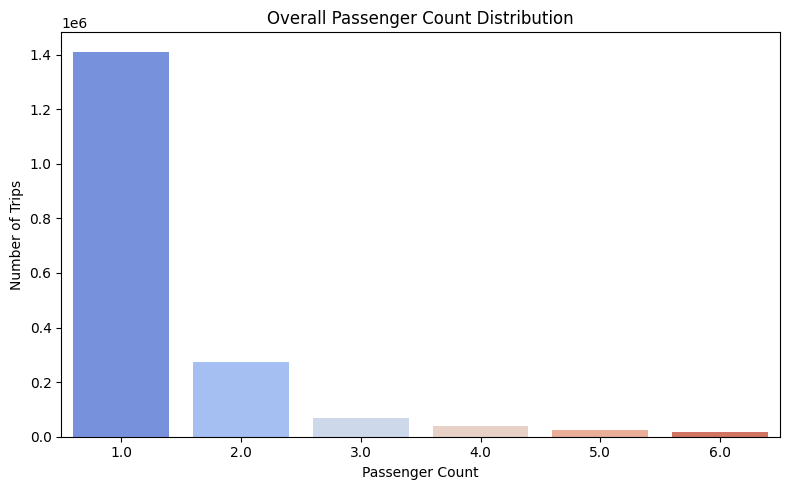

In [70]:
# See how passenger count varies across hours and days

passenger_count_df = non_zero_df[non_zero_df["passenger_count"] > 0].copy()
passenger_counts = passenger_count_df["passenger_count"].value_counts().sort_index().reset_index()
passenger_counts.columns = ["passenger_count", "trip_count"]

plt.figure(figsize=(8,5))
sns.barplot(data=passenger_counts, x="passenger_count", y="trip_count", palette="coolwarm")
plt.title("Overall Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

/tmp/ipykernel_38576/4118529363.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zone_passenger, x="zone", y="passenger_count", palette="magma")


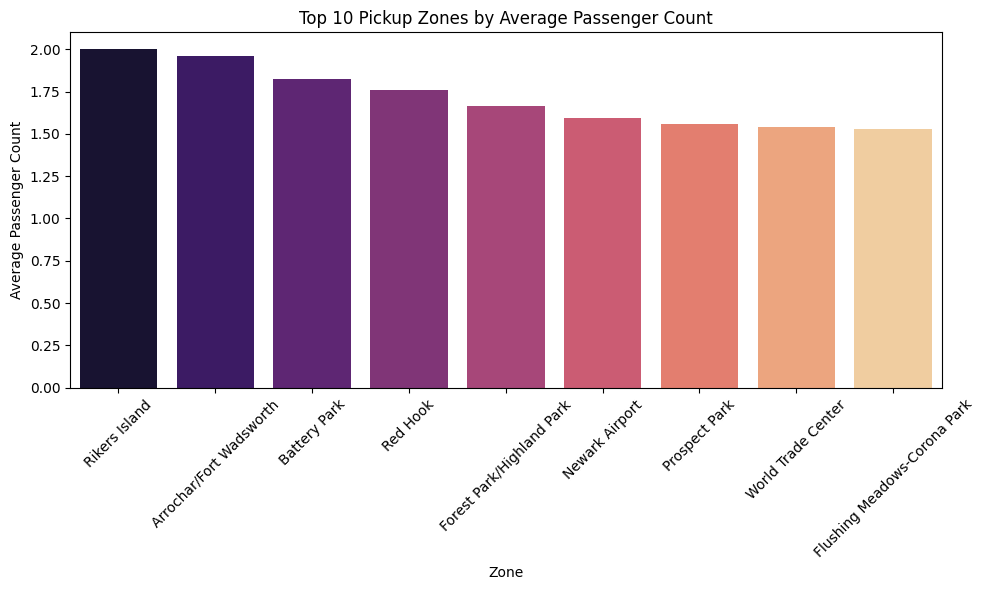

In [71]:
# How does passenger count vary across zones

zone_passenger_df = non_zero_df[non_zero_df["passenger_count"] > 0].copy()
zone_passenger_avg = zone_passenger_df.groupby("PULocationID")["passenger_count"].mean().reset_index()
zone_passenger_avg["zone"] = zone_passenger_avg["PULocationID"].map(zone_lookup)

top_zone_passenger = zone_passenger_avg.sort_values("passenger_count", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_zone_passenger, x="zone", y="passenger_count", palette="magma")
plt.title("Top 10 Pickup Zones by Average Passenger Count")
plt.xticks(rotation=45)
plt.xlabel("Zone")
plt.ylabel("Average Passenger Count")
plt.tight_layout()
plt.show()

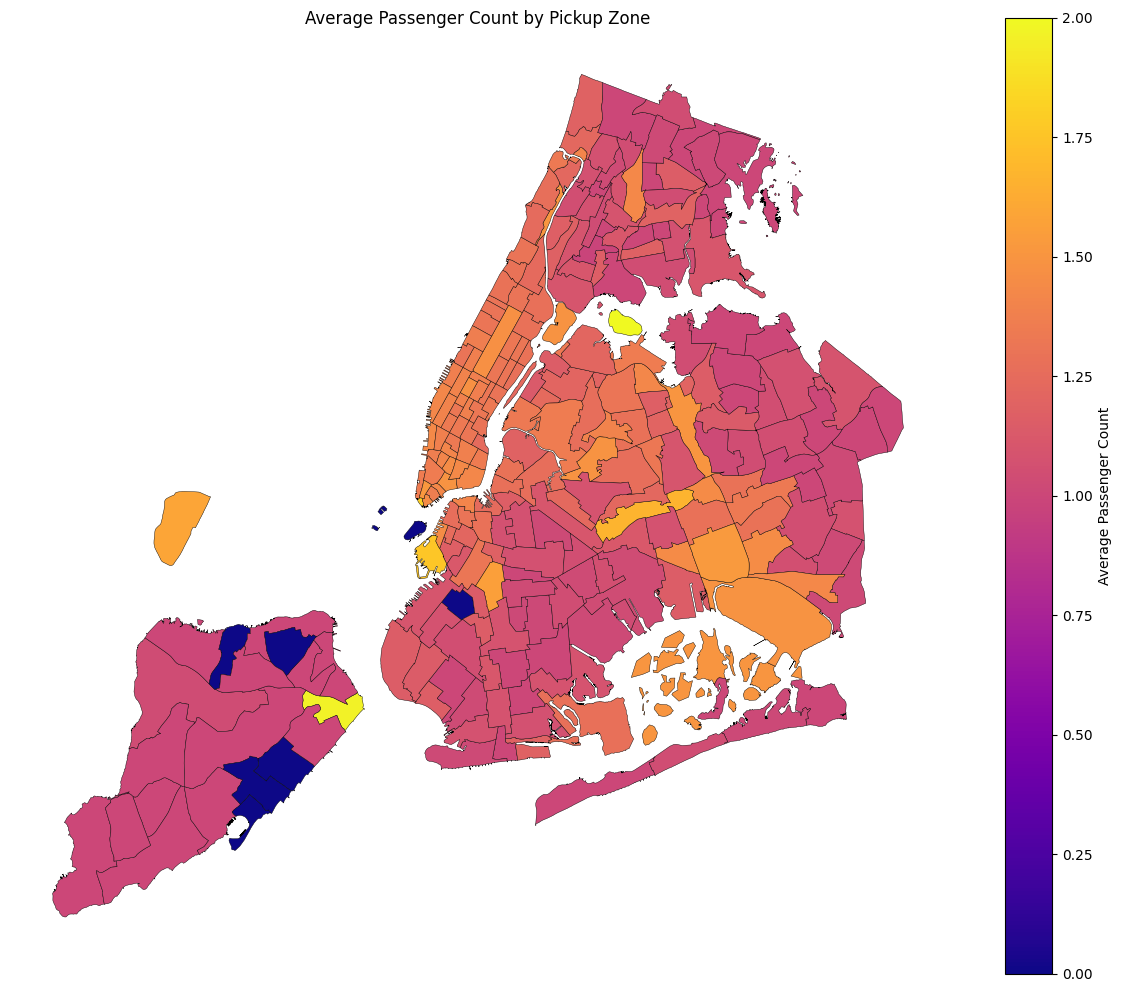

In [72]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_passenger_avg = zones.copy()
avg_passenger_by_zone = non_zero_df.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_by_zone.columns = ["LocationID", "avg_passenger_count"]

zones_with_passenger_avg = zones_with_passenger_avg.merge(avg_passenger_by_zone, on="LocationID", how="left")
zones_with_passenger_avg["avg_passenger_count"] = zones_with_passenger_avg["avg_passenger_count"].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_passenger_avg.plot(
    column="avg_passenger_count",
    ax=ax,
    cmap="plasma",
    legend=True,
    legend_kwds={"label": "Average Passenger Count", "orientation": "vertical"},
    edgecolor="black",
    linewidth=0.3
)
ax.set_title("Average Passenger Count by Pickup Zone")
ax.axis("off")
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

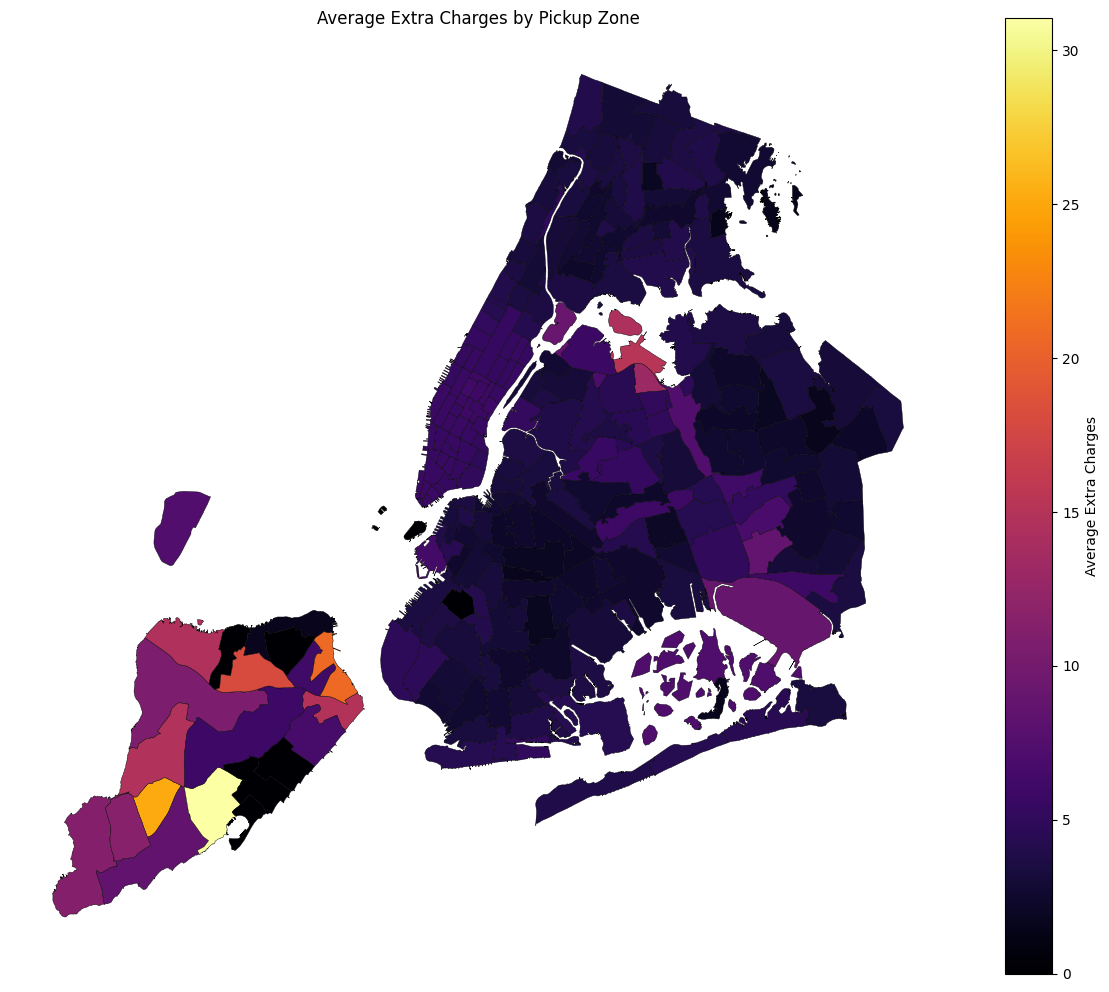

In [73]:
# How often is each surcharge applied?
extra_df = non_zero_df.copy()
extra_df["extra_charges"] = extra_df[["extra", "mta_tax", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "airport_fee"]].sum(axis=1)

avg_extra_by_zone = extra_df.groupby("PULocationID")["extra_charges"].mean().reset_index()
avg_extra_by_zone.columns = ["LocationID", "avg_extra_charges"]

zones_with_extras = zones.merge(avg_extra_by_zone, on="LocationID", how="left")
zones_with_extras["avg_extra_charges"] = zones_with_extras["avg_extra_charges"].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_extras.plot(
    column="avg_extra_charges",
    ax=ax,
    cmap="inferno",
    legend=True,
    legend_kwds={"label": "Average Extra Charges", "orientation": "vertical"},
    edgecolor="black",
    linewidth=0.3
)
ax.set_title("Average Extra Charges by Pickup Zone")
ax.axis("off")
plt.tight_layout()
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Our exploratory analysis of 2023 NYC yellow taxi trip data reveals clear temporal, spatial, and operational patterns that can significantly enhance routing and dispatching strategies. Based on these findings, we recommend the following:

1. **Time-Aware Driver Scheduling**:
   - **Peak Hours**: Dispatch more drivers during **8–10 AM** and **5–7 PM**, which show the highest demand on weekdays due to commuting patterns.
   - **Late-Night Surge**: On weekends, **11 PM to 2 AM** becomes a demand hotspot — primarily in downtown Manhattan — requiring additional night shift drivers.

2. **High-Demand Zone Deployment**:
   - Focus driver availability in **Midtown Center**, **LaGuardia**, **JFK**, **East Village**, and **Upper East Side** — the most active pickup zones.
   - These zones consistently rank at the top across hourly pickup trends and night surge pickups.

3. **Avoidance of Slow Routes**:
   - Routes such as **PULocationID 100 → DOLocationID 230** or **114 → 249** show **very low average speeds (~1.2–1.4 mph)** during certain hours (e.g., 10–11 PM).
   - These should be flagged in the dispatch system to **avoid during peak congestion**, minimizing trip delays and idle time.

4. **Route Rebalancing with PU/DO Ratios**:
   - Use **pickup/dropoff ratios** to detect net importer zones (high dropoffs but few pickups), which may leave drivers idle after drop.
   - After dropoff in such zones, **recommend repositioning** to nearby zones with high pickup density.

5. **Zone-Time Mapping for Smarter Routing**:
   - Routing decisions should be aligned with both **zone-specific demand** and **hourly efficiency** — e.g., rerouting away from slow corridors during congestion-prone hours, or targeting high-fare zones during low-traffic times.

These dispatching and routing adjustments will reduce driver downtime, improve passenger wait times, and increase fare efficiency across the board.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

To optimize supply and reduce passenger wait time, it is essential to position taxis in the right zones at the right time. Our geographic and temporal analysis yields the following actionable recommendations:

1. **Deploy Drivers in Net Exporter Zones**:
   - Zones with **high pickup/dropoff ratios** such as **LaGuardia Airport**, **Midtown Center**, and **JFK Airport** consistently generate more pickups than dropoffs.
   - These zones are ideal for positioning idle drivers due to high demand and quick trip turnover.

2. **Reposition from Net Importer Zones**:
   - Zones like **Battery Park**, **Governors Island**, and several residential pockets showed a **low pickup/dropoff ratio**, meaning drivers are likely to get stranded.
   - After a dropoff in these zones, drivers should be recommended to **reposition to nearby high-pickup zones** to maintain utilization.

3. **Nighttime Hotspots for Pre-positioning**:
   - Between **11 PM and 5 AM**, pickup activity shifts heavily to **entertainment zones** such as:
     - **East Village**
     - **Greenwich Village**
     - **Lower East Side**
   - Pre-positioning drivers in these areas during night hours — especially on **Fridays and Saturdays** — will reduce wait time and capture surge demand.

4. **Airport Timing Synchronization**:
   - **Airport zones** like JFK and LaGuardia show high inbound and outbound flow but also **slow route speeds** during evening hours.
   - Drivers should be scheduled to cover these areas **before or after known congestion windows** (e.g., avoiding 4–7 PM for inbound).

5. **Dynamic Zoning Based on Day of Week**:
   - **Weekends** show broader demand spread across boroughs, while **weekdays concentrate in Manhattan business districts**.
   - Dynamic zone allocation models should use different zone maps for weekdays vs weekends.

By incorporating these patterns into dispatch algorithms and zone-allocation policies, operators can maintain better fleet balance, improve customer experience, and maximize utilization.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Our fare and tip analysis highlights several opportunities to adjust the pricing model to improve both profitability and passenger satisfaction. We recommend the following data-driven adjustments:

1. **Distance-Tiered Fare Optimization**:
   - Short trips (0–2 miles) tend to have a **higher fare per mile** due to base fare and surcharges.
   - For competitive positioning, **consider slightly lowering base fare or short-trip rates** to remain attractive for short-distance passengers while maintaining margin on medium and long trips.

2. **Vendor Fare Variance Standardization**:
   - Analysis shows that different vendors apply **inconsistent fare-per-mile averages** across distance tiers.
   - Introduce **fare standardization guidelines** across vendors to ensure competitive pricing and transparency for riders.

3. **Nighttime Fare Adjustment**:
   - While **nighttime demand is lower**, operational cost is higher (fewer drivers, higher risk).
   - Apply or maintain **night surcharge between 11 PM and 5 AM**, particularly in zones like **Lower Manhattan** where night demand surges.

4. **Tip Optimization Strategy**:
   - Credit card users tip significantly more (tip % > 25%) than cash users.
   - Introduce **preset tipping suggestions** in digital systems (e.g., 15%, 20%, 25%) and offer **incentivized tipping** (e.g., “round up for your driver” nudges).

5. **Congestion & Extra Charge Transparency**:
   - Some zones consistently show higher extra charges due to congestion/tolls (e.g., Midtown).
   - Provide **advance fare estimates including typical extras** to increase transparency and maintain rider trust.

6. **Time-of-Day Surge Pricing (Optional)**:
   - For high-demand windows (8–10 AM, 5–7 PM), consider **modest dynamic pricing** to balance demand and supply, especially in high-density zones like **Midtown, JFK, and East Village**.

Together, these pricing adjustments can help the operator remain competitive, increase driver earnings, and improve customer experience — all while aligning with real usage data.
